In [47]:
from PIL import Image

# Image previewer for Jupyter
def scale_image(image, scale=4):
    width, height = image.size
    scaled_image = image.resize((int(width * scale), int(height * scale)), Image.Resampling.NEAREST)
    return scaled_image

# Define the dithering patterns for each brightness level
dither_matrices = [
    # Brightness level 0
    [[0, 0, 0, 0],
     [0, 0, 0, 0],
     [0, 0, 0, 0],
     [0, 0, 0, 0]],

    # Brightness level 1
    [[1, 0, 0, 0],
     [0, 0, 0, 0],
     [0, 0, 1, 0],
     [0, 0, 0, 0]],

    # Brightness level 2
    [[1, 0, 1, 0],
     [0, 0, 0, 0],
     [1, 0, 1, 0],
     [0, 0, 0, 0]],

    # Brightness level 3
    [[1, 0, 1, 0],
     [0, 1, 0, 0],
     [1, 0, 1, 0],
     [0, 0, 0, 1]],

     #Brightness level 4
    [[1, 0, 1, 0],
     [0, 1, 0, 1],
     [1, 0, 1, 0],
     [0, 1, 0, 1]],

    # Brightness level 5
    [[1, 1, 1, 0],
     [0, 1, 0, 1],
     [1, 0, 1, 1],
     [0, 1, 0, 1]],

    # Brightness level 6
    [[1, 1, 1, 1],
     [0, 1, 0, 1],
     [1, 1, 1, 1],
     [0, 1, 0, 1]],

    # Brightness level 7
    [[1, 1, 1, 1],
     [1, 1, 0, 1],
     [1, 1, 1, 1],
     [0, 1, 1, 1]],

    # Brightness level 8
    [[1, 1, 1, 1],
     [1, 1, 1, 1],
     [1, 1, 1, 1],
     [1, 1, 1, 1]],
]

In [48]:
# The amount of dithering applied to the image. A lower number = stronger dithering
DITHER_THRESHOLD = 12

# Dithering can be hard to see on HD displays. This will scale down the image, apply the dithering, and upscale the image.
RESCALE = 4

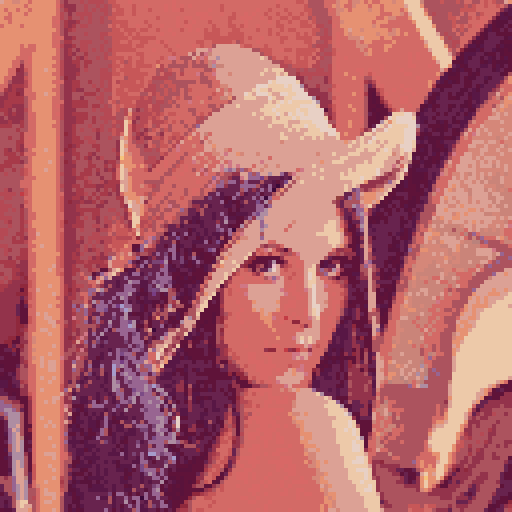

In [49]:
# Load the input image
input_image = Image.open("Lenna_(test_image).png")
input_image = scale_image(input_image, 1/RESCALE)

# Convert the image to a low-color-depth palette
palette_size = 32
quantized_image = input_image.quantize(colors=palette_size, method=2)

scale_image(quantized_image, RESCALE)

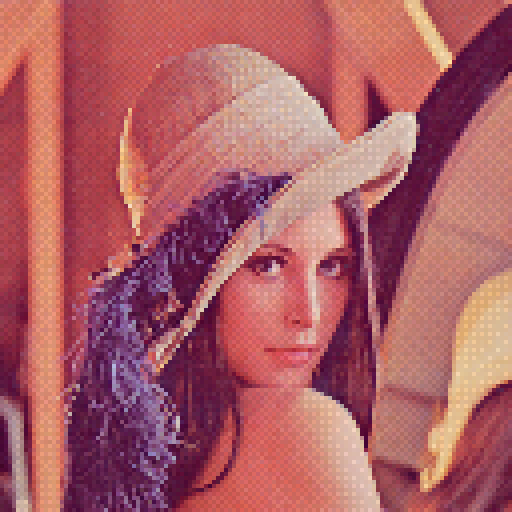

In [50]:
# Create a new image for the dithered output
output_image = Image.new("RGB", input_image.size)

# Loop over each pixel in the input image
for y in range(input_image.size[1]):
    for x in range(input_image.size[0]):

        # Get the color of the current pixel
        input_color = input_image.getpixel((x, y))

        # Calculate the brightness of the pixel
        brightness = sum(int(c) for c in input_color) // 86 # Max value 256, number of brightness bins 9, number of colours 3 -> 256 / 9 * 3

        # Find the closest color in the quantized palette
        quantized_color = quantized_image.getpixel((x, y))
        quantized_color = (quantized_color, quantized_color, quantized_color)  # convert to RGB tuple

        # Choose the appropriate dithering matrix based on the brightness level
        dither_matrix = dither_matrices[brightness]

        # Calculate the dithering threshold based on the current pixel's position in the dithering matrix
        threshold = dither_matrix[y % len(dither_matrices[0])][x % len(dither_matrices[0])] / DITHER_THRESHOLD

        # Calculate the dithered color
        dithered_color = tuple()
        for i, channel in enumerate(input_color):
            dithered_channel = int(channel + (quantized_color[i] - channel) * threshold)
            dithered_color += (dithered_channel,)

        # Set the pixel color in the output image
        output_image.putpixel((x, y), dithered_color)

# Save the output image
scale_image(output_image, RESCALE)
